#Experiment 2: Comparison of the Auto-TSF Method with Other Multivariate Time Series Forecasting Methods

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

###**HEATMAP**

In [2]:
def plot_heatmap(df, name):
  cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#21209C","#00AF91","#FF5200"])

  df.replace(['*', '**'], np.nan, inplace=True)

  for col in df.columns:
      df[col] = df[col].astype(float)

  df_normalized = df.copy()
  for col in df.columns:
      col_min = df[col].min()
      col_max = df[col].max()
      df_normalized[col] = (df[col] - col_min) / (col_max - col_min)

  plt.figure(figsize=(15, 10))
  ax = sns.heatmap(df_normalized[df.columns], annot=df[df.columns], cmap=cmap, linewidth=.5, annot_kws={"fontsize":12})
  plt.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)

  if name == 'CLIMATIC':
    ax.set_xticklabels(['\n 1 ',name+'_1 \n\n 15','\n 30','\n 1 ',name+'_2 \n\n 15','\n 30','\n 1 ',name+'_3 \n\n 15','\n 30'])
  else:
    ax.set_xticklabels(['\n 1 ',name+'_1 \n\n 15','\n 30','\n 1 ',name+'_2 \n\n 15','\n 30','\n 1 ',name+'_3 \n\n 15','\n 30', '\n 1 ',name+'_4 \n\n 15','\n 30', '\n 1 ',name+'_5 \n\n 15','\n 30'])

  plt.show()


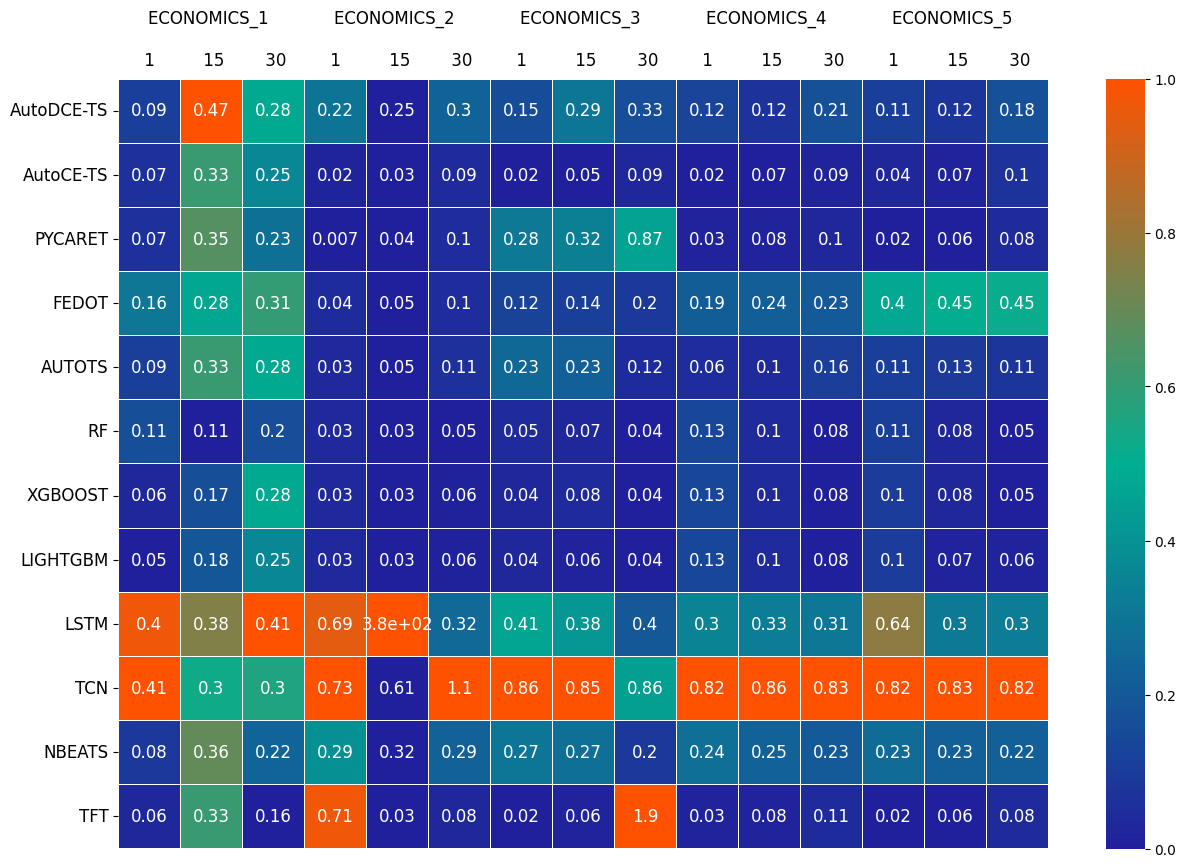

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/PatriciaLucas/AutoML/refs/heads/main/Results_paper_2/Experiment_2/economics.csv', index_col=0)
df = df.drop(columns=['Metric'])
plot_heatmap(df, 'ECONOMICS')

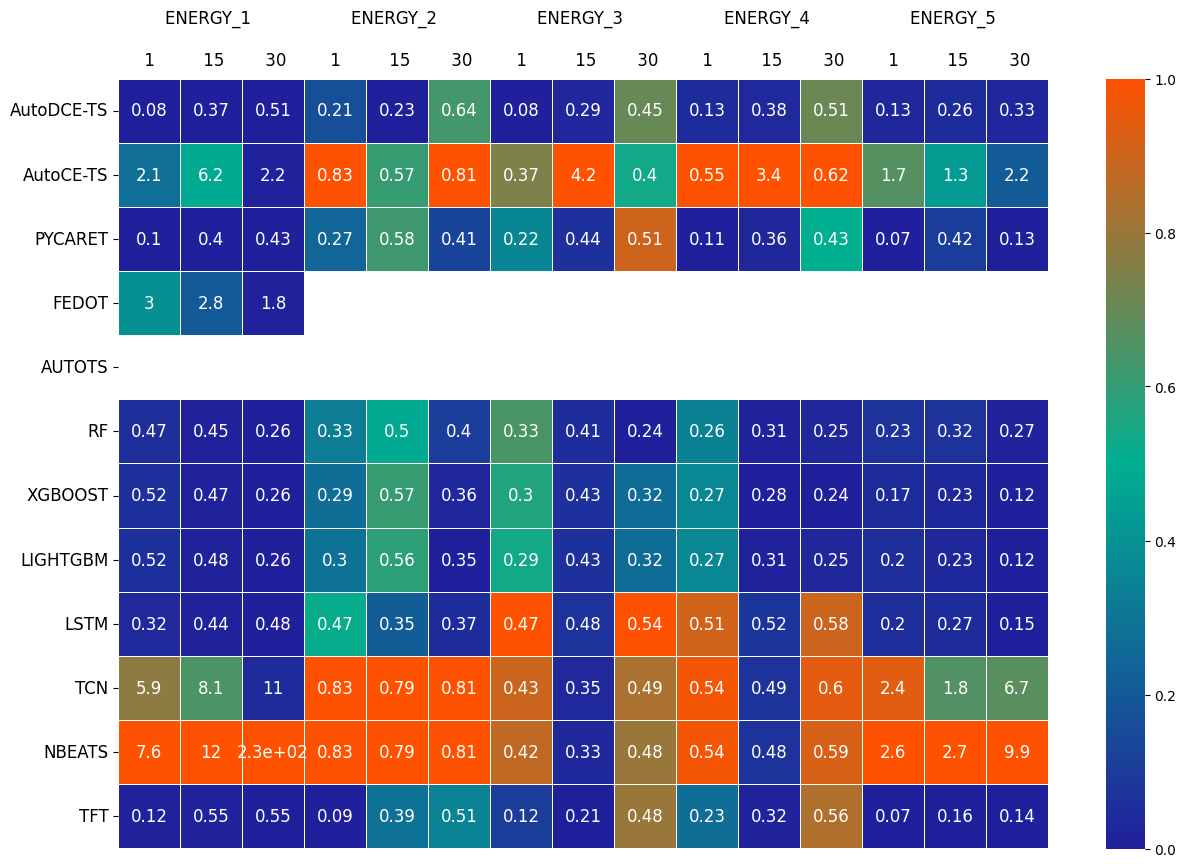

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/PatriciaLucas/AutoML/refs/heads/main/Results_paper_2/Experiment_2/energy.csv', index_col=0)
df = df.drop(columns=['Metric'])
plot_heatmap(df, 'ENERGY')

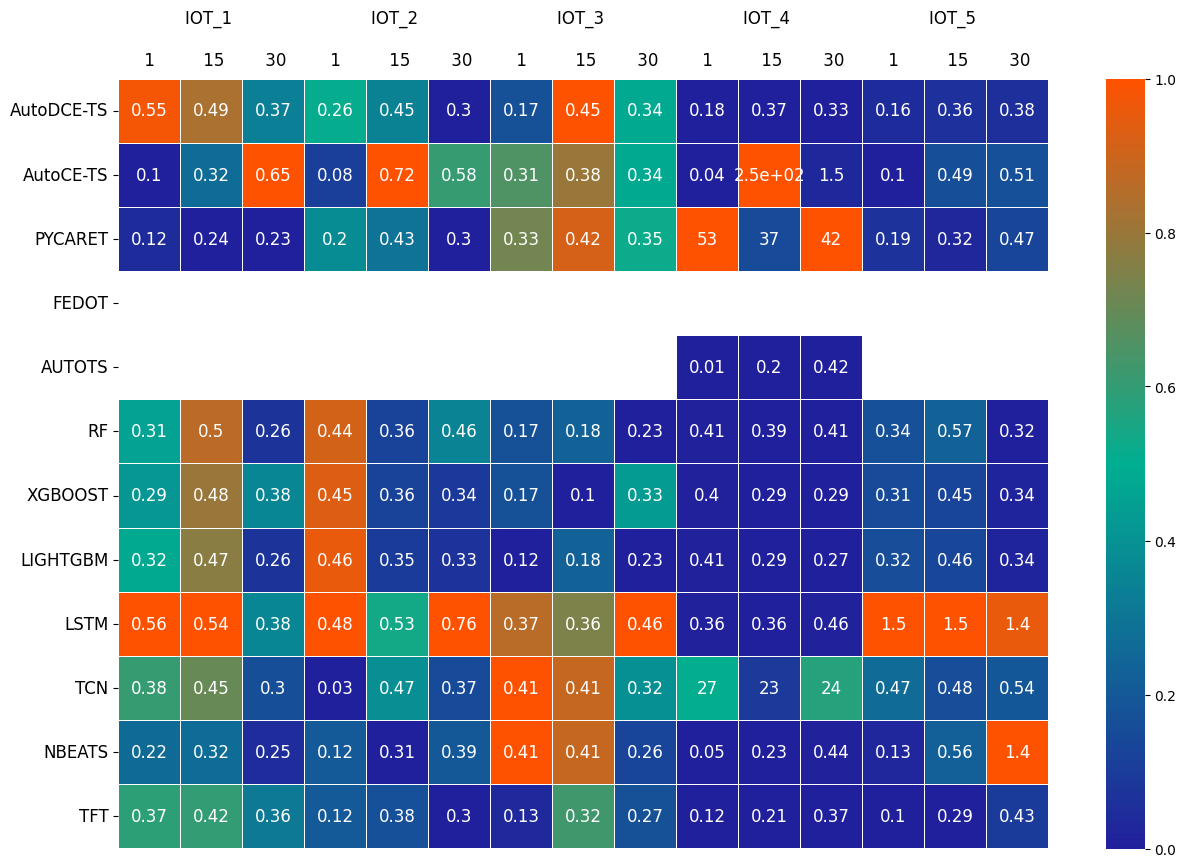

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/PatriciaLucas/AutoML/refs/heads/main/Results_paper_2/Experiment_2/iot.csv', index_col=0)
df = df.drop(columns=['Metric'])
plot_heatmap(df, 'IOT')

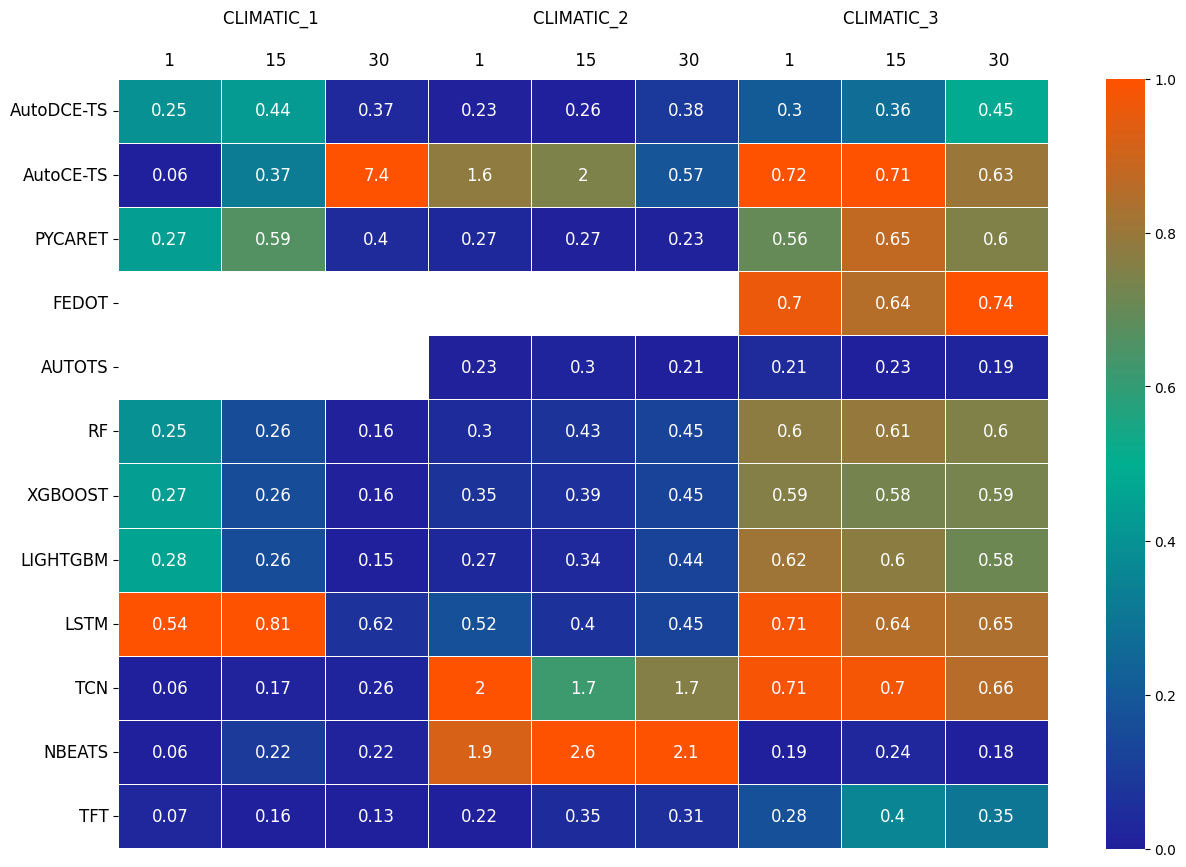

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/PatriciaLucas/AutoML/refs/heads/main/Results_paper_2/Experiment_2/climatic.csv', index_col=0)
df = df.drop(columns=['Metric'])
plot_heatmap(df, 'CLIMATIC')

###**Diagram of critical differences**

In [ ]:
!pip install autorank

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from autorank import autorank, plot_stats, create_report, latex_table

In [10]:
df_eco = pd.read_csv('https://raw.githubusercontent.com/PatriciaLucas/AutoML/refs/heads/main/Results_paper_2/Experiment_2/economicsT.csv', index_col=0)
df_en = pd.read_csv('https://raw.githubusercontent.com/PatriciaLucas/AutoML/refs/heads/main/Results_paper_2/Experiment_2/energyT.csv', index_col=0)
df_iot = pd.read_csv('https://raw.githubusercontent.com/PatriciaLucas/AutoML/refs/heads/main/Results_paper_2/Experiment_2/iotT.csv', index_col=0)
df_clima = pd.read_csv('https://raw.githubusercontent.com/PatriciaLucas/AutoML/refs/heads/main/Results_paper_2/Experiment_2/climaticT.csv', index_col=0)
df_eco.index = ['ECONOMICS'] * len(df_eco)
df_en.index = ['ENERGY'] * len(df_en)
df_iot.index = ['IOT'] * len(df_iot)
df_clima.index = ['CLIMATIC'] * len(df_clima)
df = pd.concat([df_eco,df_en,df_iot,df_clima])

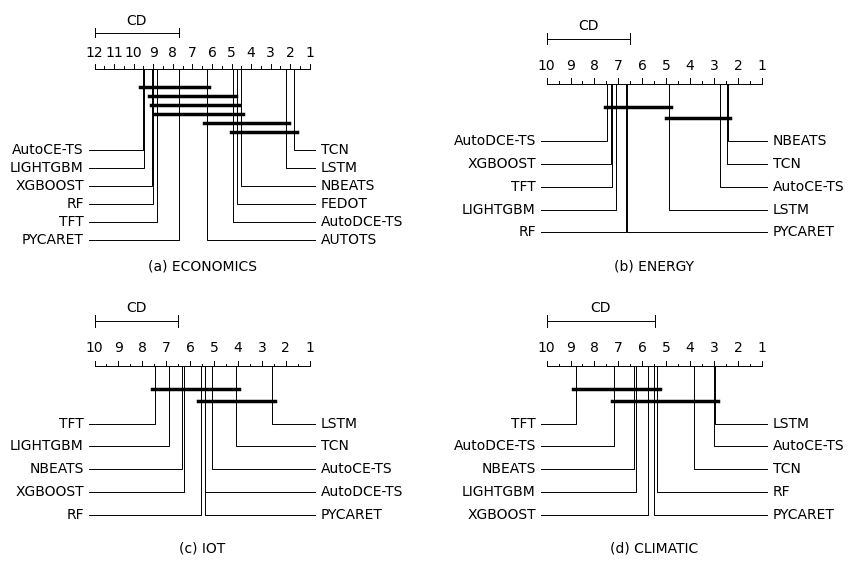

In [11]:
fig, axes = plt.subplots(2,2, figsize=(10,7), dpi=100)
plt.subplots_adjust(wspace=0.4,
                    hspace=0.1)
names = ['ECONOMICS','ENERGY','IOT','CLIMATIC']
letra = ['(a)','(b)','(c)','(d)']

l = 0
for name, ax in zip(names, axes.flatten()):
  if name == 'ECONOMICS':
    df_rank = df_eco
  elif name == 'ENERGY':
    df_rank = df_en
  elif name == 'IOT':
    df_rank = df_iot
  else:
    df_rank = df_clima
  res = autorank(df_rank, alpha=0.05, verbose=False)
  b = plot_stats(res, allow_insignificant=True, ax=ax)
  ax.text(0.5, 1, letra[l]+" "+name, ha='center', va='center', fontsize=10)
  l = l+1

####**Test reports for ECONOMICS**

In [ ]:
df_rank = df_eco
res = autorank(df_rank, alpha=0.05, verbose=False)
print(res)
create_report(res)

RankResult(rankdf=
           meanrank  median   mad ci_lower ci_upper effect_size   magnitude
Auto-TSF*  9.533333    0.07  0.03     0.02     0.33         0.0  negligible
LIGHTGBM   9.466667    0.06  0.02     0.03     0.25    0.264557       small
XGBOOST    9.066667    0.08  0.03     0.03     0.28    -0.22483       small
RF         9.000000    0.08  0.03     0.03      0.2    -0.22483       small
TFT        8.800000    0.08  0.05     0.02     1.87   -0.163588  negligible
PYCARET    7.700000    0.08  0.05    0.007     0.87   -0.163588  negligible
AUTOTS     6.266667    0.11  0.05     0.03     0.33   -0.654352      medium
Auto-TSF   4.900000    0.21  0.09     0.09     0.47    -1.40766       large
FEDOT      4.733333    0.20  0.08     0.04     0.45   -1.451353       large
NBEATS     4.533333    0.24  0.03     0.08     0.36   -3.822114       large
LSTM       2.200000    0.38  0.06      0.3   379.27   -4.408049       large
TCN        1.800000    0.82  0.04      0.3      1.1   -14.30811      

####**Test reports for ENERGY**

In [ ]:
df_rank = df_en
res = autorank(df_rank, alpha=0.05, verbose=False)
print(res)
create_report(res)

RankResult(rankdf=
           meanrank  median   mad ci_lower ci_upper effect_size   magnitude
Auto-TSF   7.466667    0.29  0.16     0.08     0.64         0.0  negligible
XGBOOST    7.300000    0.29  0.06     0.12     0.57         0.0  negligible
TFT        7.266667    0.23  0.14     0.07     0.56    0.269199       small
LIGHTGBM   7.100000    0.30  0.05     0.12     0.56   -0.056903  negligible
RF         6.666667    0.32  0.07     0.23      0.5   -0.163856  negligible
PYCARET    6.633333    0.40  0.11     0.07     0.58   -0.540397      medium
LSTM       4.900000    0.47  0.07     0.15     0.58   -0.983136       large
Auto-TFS*  2.766667    1.27  0.87     0.37     6.21   -1.056756       large
TCN        2.466667    0.81  0.38     0.35    10.83   -1.203012       large
NBEATS     2.433333    0.81  0.39     0.33   233.96   -1.176659       large
pvalue=2.1419436024520324e-11
cd=3.497623455411244
omnibus=friedman
posthoc=nemenyi
all_normal=False
pvals_shapiro=[0.6204241972482456, 0.0004803

####**Test reports for IOT**

In [ ]:
df_rank = df_iot
res = autorank(df_rank, alpha=0.05, verbose=False)
print(res)
create_report(res)

RankResult(rankdf=
           meanrank  median   mad ci_lower ci_upper effect_size   magnitude
TFT        7.466667    0.30  0.08      0.1     0.43         0.0  negligible
LIGHTGBM   6.866667    0.32  0.06     0.12     0.47   -0.190775  negligible
NBEATS     6.333333    0.31   0.1     0.05     1.45   -0.074485  negligible
XGBOOST    6.266667    0.34  0.05      0.1     0.48   -0.404442       small
RF         5.566667    0.36  0.08     0.17     0.57   -0.505868      medium
PYCARET    5.400000    0.33   0.1     0.12    52.61   -0.223455       small
Auto-TSF   5.366667    0.36  0.09     0.16     0.55    -0.47529       small
Auto-TFS*  5.100000    0.38  0.27     0.04   246.32   -0.270984       small
TCN        4.066667    0.45  0.08     0.03    26.57    -1.26467       large
LSTM       2.566667    0.48  0.11     0.36      1.5   -1.262344       large
pvalue=0.0005329680492491126
cd=3.497623455411244
omnibus=friedman
posthoc=nemenyi
all_normal=False
pvals_shapiro=[0.00021249357410499348, 5.8292

####**Test reports for CLIMATIC**

In [ ]:
df_rank = df_clima
res = autorank(df_rank, alpha=0.05, verbose=False)
print(res)
create_report(res)

RankResult(rankdf=
           meanrank  median   mad ci_lower ci_upper effect_size   magnitude
TFT        8.777778    0.28  0.07     0.07      0.4         0.0  negligible
Auto-TSF   7.166667    0.36  0.08     0.23     0.45   -0.717863      medium
NBEATS     6.333333    0.22  0.04     0.06     2.56    0.709881      medium
LIGHTGBM   6.277778    0.34   0.1     0.15     0.62   -0.468866       small
XGBOOST    5.777778    0.39  0.13     0.16     0.59   -0.710649      medium
PYCARET    5.500000    0.40  0.16     0.23     0.65   -0.655424      medium
RF         5.388889    0.43  0.17     0.16     0.61   -0.778259      medium
TCN        3.833333    0.70  0.53     0.06      2.0   -0.749392      medium
Auto-TSF*  3.000000    0.71  0.34     0.06     7.37   -1.181588       large
LSTM       2.944444    0.62  0.09      0.4     0.81    -2.84445       large
pvalue=0.0003927493668699575
cd=4.515412464704063
omnibus=friedman
posthoc=nemenyi
all_normal=False
pvals_shapiro=[0.0001676224990186811, 0.00233